<a href="https://colab.research.google.com/github/ranggaanugrah/DataScienceProject/blob/main/Portofolio_Telco_Churn_Prediction_Rangga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center><span style='background :#F5EEF3' > Telco Churn Prediction 


# Data Preparation

## Read Data

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project DS/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Cleaning Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total charge bertipe object, harusnya numerik.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
#cek data yang null
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Ada missing values pada total charge

In [ ]:
#drop baris missing values
df.dropna(inplace=True,axis=0)

In [ ]:
#cek data yang null
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.shape

(7032, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
#Drop Kolom yang tidak diperlukan
df = df.drop(columns=['customerID'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}:{df[column].unique()}')

In [ ]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
#Merubah No Internet Service & No Phone Service menjadi No
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [ ]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


# EDA

## Feature vs Target

### Categorical Feature

[Text(0, 0, 'Electronic check'),
 Text(0, 0, 'Mailed check'),
 Text(0, 0, 'Bank transfer (automatic)'),
 Text(0, 0, 'Credit card (automatic)')]

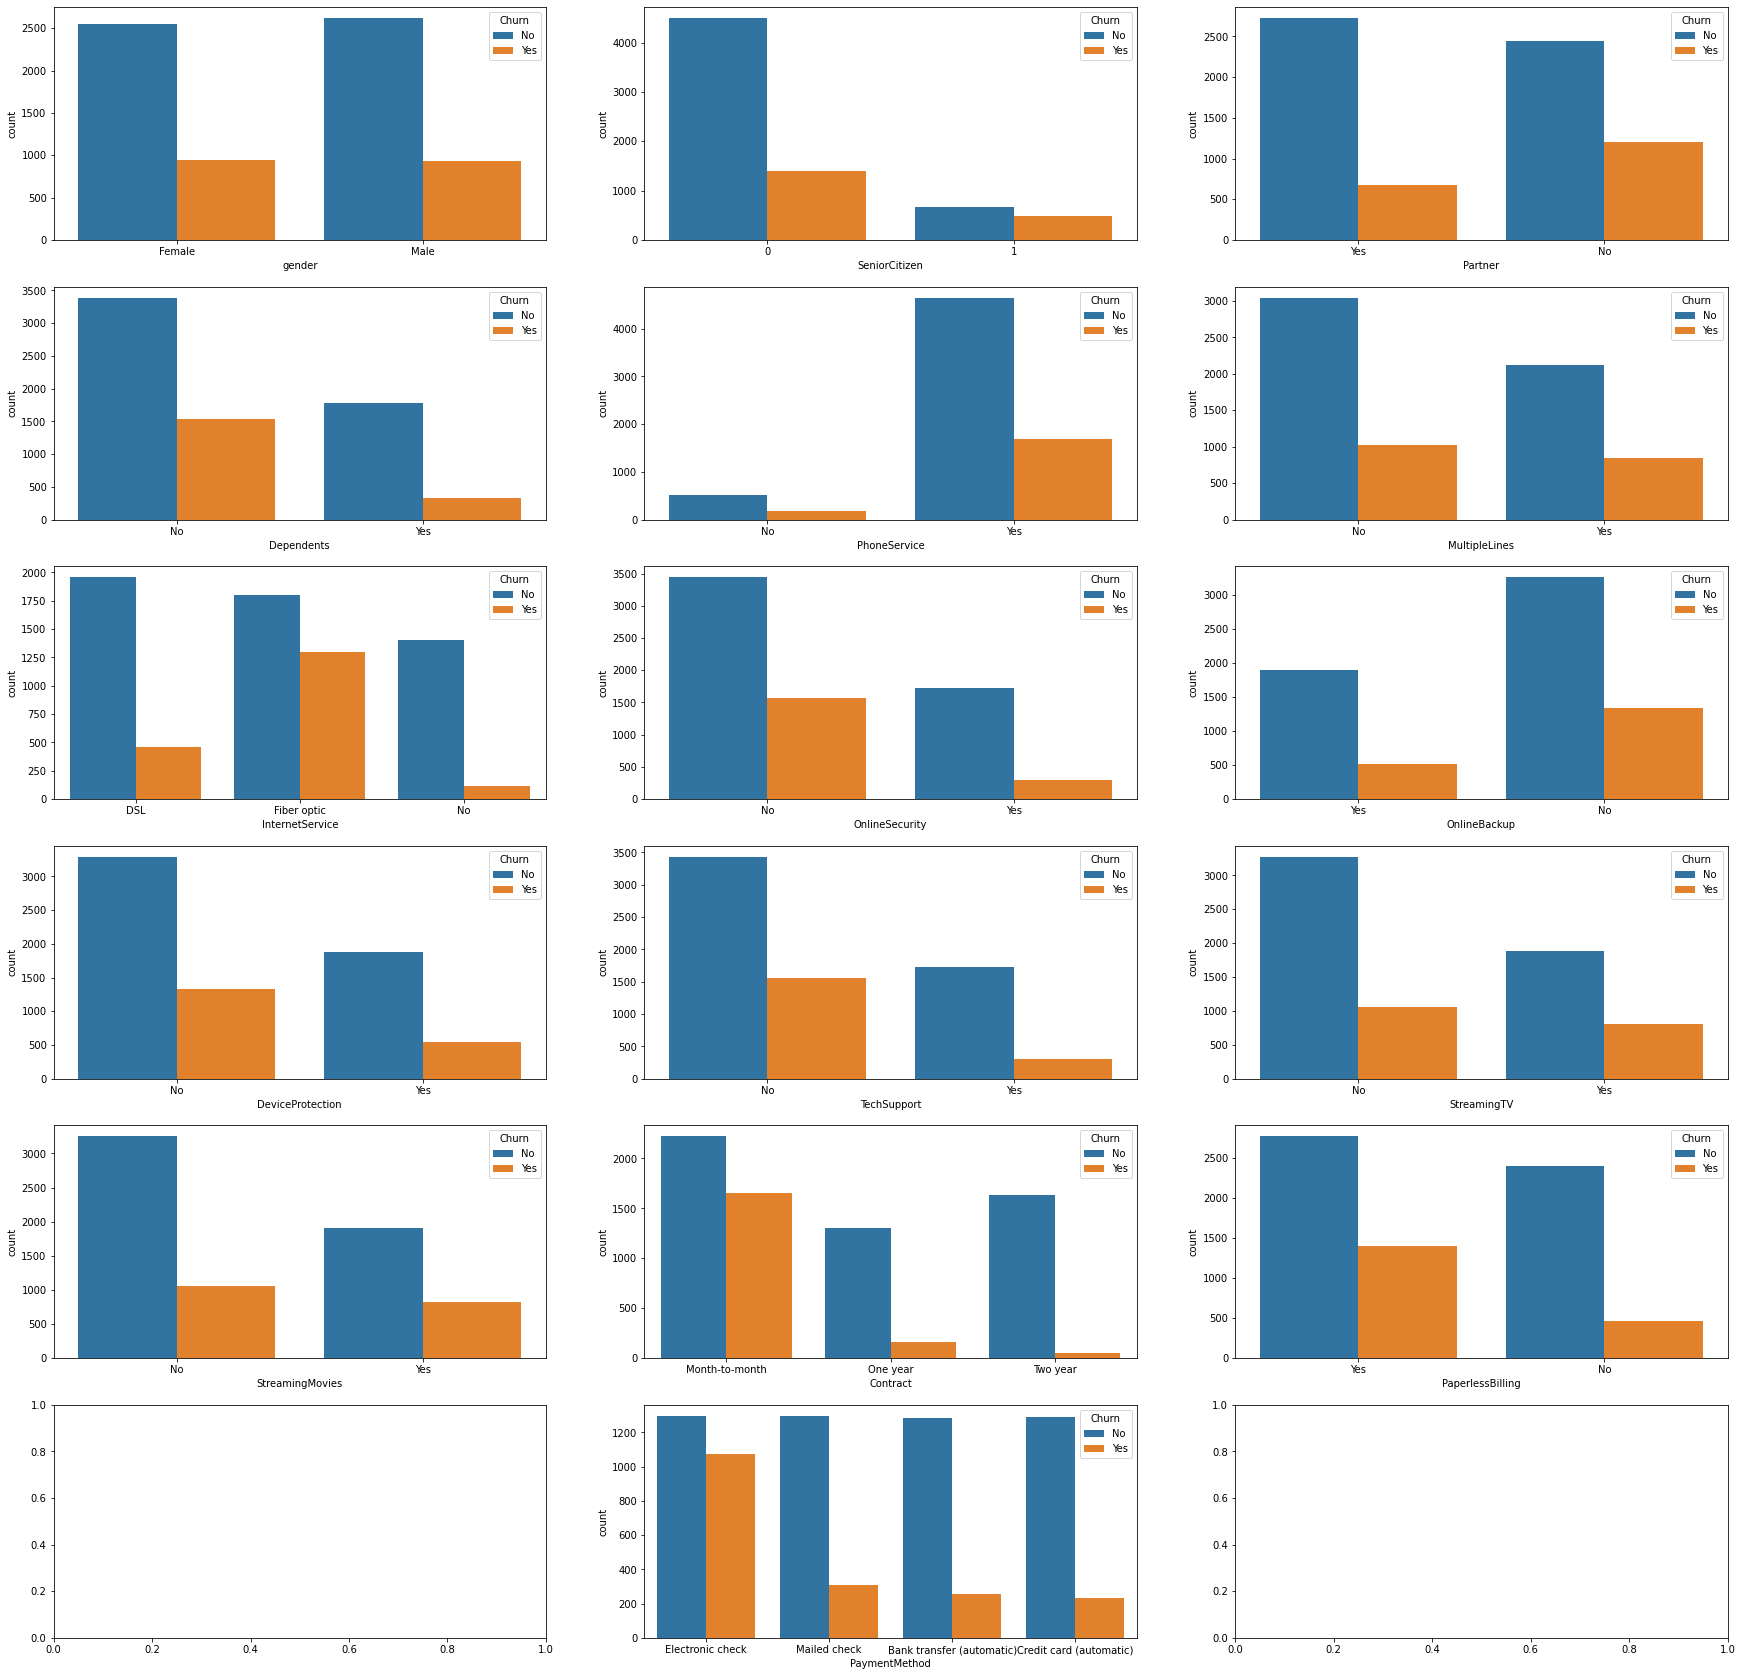

In [ ]:
rotation_angle = 0

fig, ax = plt.subplots(nrows=6, ncols=3, **{'figsize': (30, 30)})    

graph_1 = sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
graph_1.set_xticklabels(graph_1.get_xticklabels(),rotation=rotation_angle)

graph_2 = sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][1])
graph_2.set_xticklabels(graph_2.get_xticklabels(),rotation=rotation_angle)

graph_3 = sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][2])
graph_3.set_xticklabels(graph_3.get_xticklabels(),rotation=rotation_angle)

graph_4 = sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax[1][0])
graph_4.set_xticklabels(graph_4.get_xticklabels(),rotation=rotation_angle)

graph_5 = sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][1])
graph_5.set_xticklabels(graph_5.get_xticklabels(),rotation=rotation_angle)

graph_6 = sns.countplot(data=df, x='MultipleLines', hue='Churn', ax=ax[1][2])
graph_6.set_xticklabels(graph_6.get_xticklabels(),rotation=rotation_angle)

graph_7 = sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[2][0])
graph_7.set_xticklabels(graph_7.get_xticklabels(),rotation=rotation_angle)

graph_8 = sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=ax[2][1])
graph_8.set_xticklabels(graph_8.get_xticklabels(),rotation=rotation_angle)

graph_9 = sns.countplot(data=df, x='OnlineBackup', hue='Churn', ax=ax[2][2])
graph_9.set_xticklabels(graph_9.get_xticklabels(),rotation=rotation_angle)

graph_10 = sns.countplot(data=df, x='DeviceProtection', hue='Churn', ax=ax[3][0])
graph_10.set_xticklabels(graph_10.get_xticklabels(),rotation=rotation_angle)

graph_11 = sns.countplot(data=df, x='TechSupport', hue='Churn', ax=ax[3][1])
graph_11.set_xticklabels(graph_11.get_xticklabels(),rotation=rotation_angle)

graph_12 = sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[3][2])
graph_12.set_xticklabels(graph_12.get_xticklabels(),rotation=rotation_angle)

graph_13 = sns.countplot(data=df, x='StreamingMovies', hue='Churn', ax=ax[4][0])
graph_13.set_xticklabels(graph_13.get_xticklabels(),rotation=rotation_angle)

graph_14 = sns.countplot(data=df, x='Contract', hue='Churn', ax=ax[4][1])
graph_14.set_xticklabels(graph_14.get_xticklabels(),rotation=rotation_angle)

graph_15 = sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[4][2])
graph_15.set_xticklabels(graph_15.get_xticklabels(),rotation=rotation_angle)

graph_16 = sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=ax[5][1])
graph_16.set_xticklabels(graph_16.get_xticklabels(),rotation=rotation_angle)

### Numerical Feature

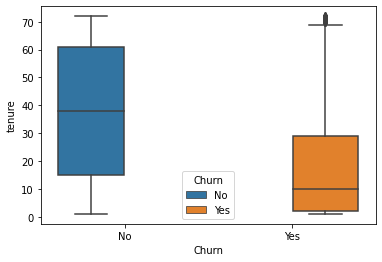

In [ ]:
#Tenure
sns.boxplot(y = "tenure", x = 'Churn', hue = "Churn", data=df)
plt.show()

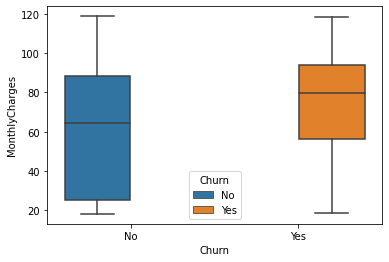

In [ ]:
sns.boxplot(y = "MonthlyCharges", x = 'Churn', hue = "Churn", data=df)
plt.show()

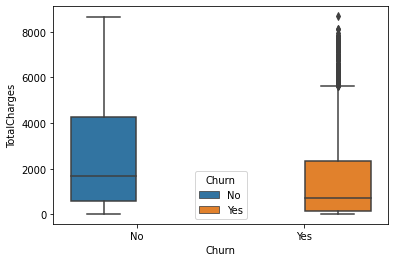

In [ ]:
sns.boxplot(y = "TotalCharges", x = 'Churn', hue = "Churn", data=df)
plt.show()

## Target Distribution

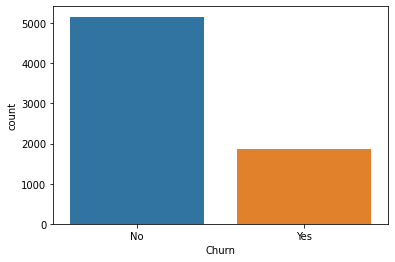

In [ ]:
sns.countplot(x="Churn", data=df)
plt.show()

In [ ]:
df['Churn'].value_counts()*100/len(df)

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

# Data Preparation

In [ ]:
#Buat Backup
df1=df

In [ ]:
#Merubah gender ke numerik Female = 0 dan Male = 1
df1['gender'].replace({'Female':0,'Male':1},inplace=True)
df1.gender.unique()

array([0, 1])

In [ ]:
#Merubah churn ke numerik No = 0 dan Yes = 1
df1['Churn'].replace({'Yes':1,'No':0},inplace=True)
df1.Churn.unique()

array([0, 1])

In [ ]:
for col in df1:
    print(f'{col}: {df[col].unique()}') 

gender: [0 1]
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
#Encoding Data Categorical (One-hot-encoding)
col_to_encode=['InternetService', 'Contract','PaymentMethod', 'Partner','Dependents',
               'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
               'PaperlessBilling']

In [ ]:
df1 = pd.get_dummies(df1, columns = col_to_encode)

In [ ]:
print(df1.shape)
df1

(7032, 38)


,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,0,1,29.85,29.85,0,1,0,0,1,...,1,0,1,0,1,0,1,0,0,1
1,1,0,34,56.95,1889.50,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2,1,0,2,53.85,108.15,1,1,0,0,1,...,1,0,1,0,1,0,1,0,0,1
3,1,0,45,42.30,1840.75,0,1,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,0,0,2,70.70,151.65,1,0,1,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,24,84.80,1990.50,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,1
7039,0,0,72,103.20,7362.90,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,1
7040,0,0,11,29.60,346.45,0,1,0,0,1,...,1,0,1,0,1,0,1,0,0,1
7041,1,1,4,74.40,306.60,1,0,1,0,1,...,1,0,1,0,1,0,1,0,0,1


In [ ]:
df1.isnull().sum()

gender                                     0
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLi

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split

X = df1.drop(columns=["Churn"]).copy()
y = df1["Churn"].copy()

## Balancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler


oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X_over, y_over, test_size = 0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7744, 37)
(2582, 37)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(2582, 37)
(2582,)


# Modelling

## Fitting

In [ ]:
# Logistic Regression, SVC, Random Forest, dll
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Fit model
log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
print("Logistic Regression")
y_pred_lr = log.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_lr)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_lr)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_lr)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred_lr)))

y_pred_proba = log.predict_proba(X_test)[::,-1]
print("ROC AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))

Logistic Regression
Accuracy: 0.77
Precision: 0.74
Recall: 0.81
F1-Score: 0.77
ROC AUC: 0.84


In [ ]:
print("Random Forest")
y_pred_rf = rf.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_rf)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_rf)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred_rf)))

y_pred_proba = rf.predict_proba(X_test)[::,-1]
print("ROC AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))

Random Forest
Accuracy: 0.88
Precision: 0.84
Recall: 0.94
F1-Score: 0.89
ROC AUC: 0.95


In [ ]:
print("Decision Tree")
y_pred_dt = dt.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_dt)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_dt)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred_dt)))

y_pred_proba = dt.predict_proba(X_test)[::,-1]
print("ROC AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))

Decision Tree
Accuracy: 0.86
Precision: 0.81
Recall: 0.93
F1-Score: 0.87
ROC AUC: 0.86


**Random Forest Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1304
           1       0.84      0.94      0.89      1278

    accuracy                           0.88      2582
   macro avg       0.89      0.89      0.88      2582
weighted avg       0.89      0.88      0.88      2582



**Random Forest Confusion Matrix**

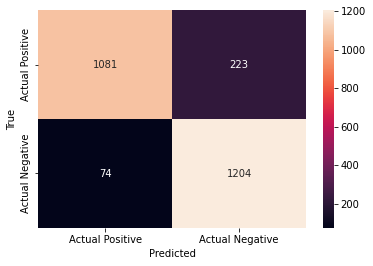

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test,y_pred_rf)
x_axis_labels = ['Actual Positive','Actual Negative']
y_axis_labels = ['Actual Positive','Actual Negative']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout
plt.show()


## Feature Importance

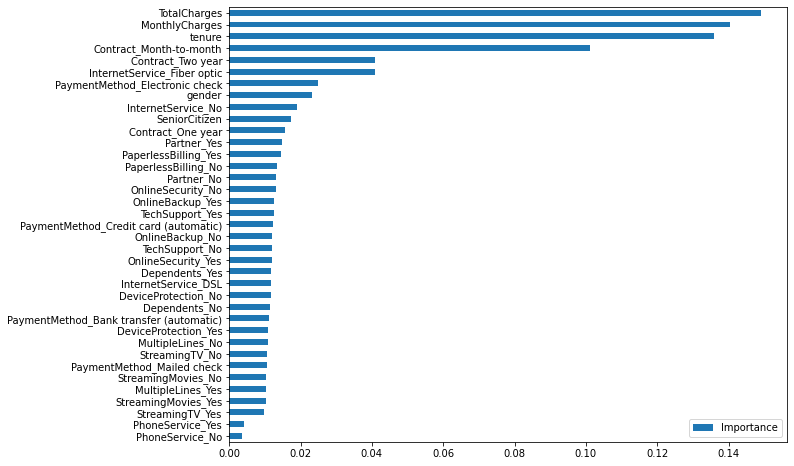

In [ ]:
feat_importances = pd.DataFrame(rf.feature_importances_, index=X_test.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh',figsize=(10,8))

TotalCharges,MonthlyCharges dan tenure merupakan fitur terpenting yang mempengaruhi model prediksi.

# Save Model

In [ ]:
# from google.colab import drive
# drive.mount('drive')
import pickle

# save the model to disk
pickle.dump(rf, open('churn_prediction_model.pkl', 'wb'))

!cp churn_prediction_model.pkl "drive/My Drive/Project DS"
